In [1]:
import pandas as pd
import numpy as np
import preprocess
import matplotlib.pyplot as plt

In [2]:
col_names = ['Data Retention', 'Data Security', 'Do Not Track',
       'First Party Collection/Use', 'International and Specific Audiences',
       'Introductory/Generic', 'Policy Change', 'Practice not covered',
       'Privacy contact information', 'Third Party Sharing/Collection',
       'User Access, Edit and Deletion', 'User Choice/Control']

In [3]:
majority_path = r'C:\Users\IsmailKaraman\workspace\data\privacy_policy_data\OPP-115_v2\majority.csv'

In [4]:
df = pd.read_csv(majority_path)

In [5]:
df.head()

,text,Data Retention,Data Security,Do Not Track,First Party Collection/Use,International and Specific Audiences,Introductory/Generic,Policy Change,Practice not covered,Privacy contact information,Third Party Sharing/Collection,"User Access, Edit and Deletion",User Choice/Control
0,"""""Contact Us"""" Link If you contact us through...",0,0,0,1,0,0,0,0,0,0,0,0
1,(b) Information automatically collected There...,0,0,0,1,0,0,0,0,0,0,0,0
2,(ii) You have entered a contest or sweepstake...,0,0,0,0,0,0,0,0,0,1,0,0
3,*Web Beacons: Military Web pages and the Web ...,0,0,0,1,0,0,0,0,0,1,0,0
4,1. INFORMATION WE COLLECT We collect the foll...,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
data_dist = df[col_names].sum()
data_dist

Data Retention                            78
Data Security                            207
Do Not Track                              31
First Party Collection/Use              1181
International and Specific Audiences     296
Introductory/Generic                     378
Policy Change                            116
Practice not covered                     129
Privacy contact information              202
Third Party Sharing/Collection           931
User Access, Edit and Deletion           147
User Choice/Control                      352
dtype: int64

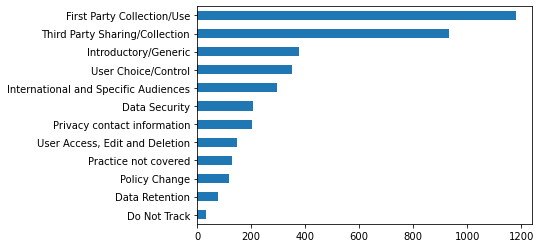

In [7]:
data_dist.sort_values().plot(kind='barh')

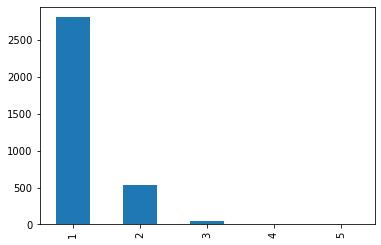

In [8]:
df[col_names].sum(axis=1).value_counts().plot(kind='bar')

In [9]:
df.shape

(3399, 13)

In [10]:
# preprocessing text data
df['text'] = df['text'].apply(preprocess.preprocess_text)

In [11]:
X = df['text']
y = df[col_names]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

# a base classifier

In [13]:
def print_losses(y_test, preds, clf):
     
    print("\033[1m" + clf + ' results: ' + "\033[0m")
    print('----------------------')
    hamLoss = hamming_loss(y_test.values, preds)
    print('hamLoss: {:.2f}'.format(hamLoss))
    acc_score = accuracy_score(y_test.values, preds)
    print('Exact Match Ratio: {:.2f}'.format(acc_score))
    print('-----------------------------------------------')
    print("\033[1m" + 'Classification Report' + "\033[0m")
    print(classification_report(y_test.values, preds, target_names=list(y_test.columns)))
    print('--------------------------------------------------------------------------------------------')
    print()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
def calculating_class_weights(y_true):
    from sklearn.utils.class_weight import compute_class_weight
    number_dim = np.shape(y_true)[1]
    weights = []
    for i in range(number_dim):
        weights.append(dict(zip([0,1], compute_class_weight('balanced', [0.,1.], y_true[:, i]))))
        # weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])))
    return weights

In [17]:
class_weights = calculating_class_weights(y.values)
class_weights

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0.0, 1.0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0.0, 1.0], y=[1 1 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0.0, 1.0], y=[0 0 1 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[{0: 0.511743450767841, 1: 21.78846153846154},
 {0: 0.5324248120300752, 1: 8.210144927536232},
 {0: 0.5046021377672208, 1: 54.82258064516129},
 {0: 0.7662308385933273, 1: 1.439034716342083},
 {0: 0.5476957782790848, 1: 5.741554054054054},
 {0: 0.5625620655412115, 1: 4.496031746031746},
 {0: 0.5176667681998173, 1: 14.650862068965518},
 {0: 0.5197247706422018, 1: 13.174418604651162},
 {0: 0.5315921176102596, 1: 8.413366336633663},
 {0: 0.688614262560778, 1: 1.8254564983888293},
 {0: 0.5226014760147601, 1: 11.561224489795919},
 {0: 0.5577617328519856, 1: 4.828125}]

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_sample_weight.html

# Linear SVM
linearSvm = OneVsRestClassifier(LinearSVC(class_weight='balanced'), n_jobs=-1)
linearSvm.fit(X_train, y_train.values)
linearSvm_preds = linearSvm.predict(X_test)
print_losses(y_test, linearSvm_preds, 'Linear SVM Classifier')

# SVM
svmClassifier = OneVsRestClassifier(SVC(class_weight='balanced'), n_jobs=-1)
svmClassifier.fit(X_train, y_train.values)
svmPreds = svmClassifier.predict(X_test)
print_losses(y_test, svmPreds, 'SVM Classifier')

# Logistic Regression
lrc = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
lrc.fit(X_train, y_train.values)
lrc_preds = lrc.predict(X_test)
print_losses(y_test, lrc_preds, 'Logistic Regression Classifier')

# Decision Tree
dtc = OneVsRestClassifier(DecisionTreeClassifier(class_weight='balanced'), n_jobs=-1)
dtc.fit(X_train, y_train.values)
dtc_preds = dtc.predict(X_test)
print_losses(y_test, dtc_preds, 'Decision Tree Classifier')

# KNN
knn = OneVsRestClassifier(KNeighborsClassifier(), n_jobs=-1)
knn.fit(X_train, y_train.values)
knn_preds = knn.predict(X_test)
print_losses(y_test, knn_preds, 'Random Forest Classifier')

# Naive Bayes
nbc = OneVsRestClassifier(GaussianNB(), n_jobs=-1)
nbc.fit(X_train, y_train.values)
nbc_preds = nbc.predict(X_test)
print_losses(y_test, nbc_preds, 'Naive Bayes Classifier')

# Linear Discriminant Analysis
lda = OneVsRestClassifier(LinearDiscriminantAnalysis(), n_jobs=-1)
lda.fit(X_train, y_train.values)
lda_preds = lda.predict(X_test)
print_losses(y_test, lda_preds, 'Linear Discriminant Analysis Classifier')

# Random Forest
rfc = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, class_weight='balanced'), n_jobs=-1)
rfc.fit(X_train, y_train.values)
rfc_preds = rfc.predict(X_test)
print_losses(y_test, rfc_preds, 'Random Forest Classifier')

# Adaboost Classifier
abc = OneVsRestClassifier(AdaBoostClassifier(), n_jobs=-1)
abc.fit(X_train, y_train.values)
abc_preds = abc.predict(X_test)
print_losses(y_test, abc_preds, 'Adaboost Classifier')

# Gradient Boosting Classifier
gbc = OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=-1)
gbc.fit(X_train, y_train.values)
gbc_preds = gbc.predict(X_test)
print_losses(y_test, gbc_preds, 'Gradient Boosting Classifier')

# Extra Trees Classifier
etc = OneVsRestClassifier(ExtraTreeClassifier(), n_jobs=-1)
etc.fit(X_train, y_train.values)
etc_preds = etc.predict(X_test)
print_losses(y_test, etc_preds, 'Extra Trees Classifier')

Linear SVM Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.58
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.40      0.18      0.25        11
                       Data Security       0.85      0.75      0.80        44
                        Do Not Track       1.00      0.75      0.86         8
          First Party Collection/Use       0.80      0.86      0.83       237
International and Specific Audiences       0.87      0.92      0.89        60
                Introductory/Generic       0.62      0.73      0.67        75
                       Policy Change       0.77      0.85      0.81        27
                Practice not covered       0.33      0.30      0.32        23
         Privacy contact information       0.67      0.75      0.71        32
      Third Party Sharing/Collection       0.75      0.7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Classifier results: 
----------------------
hamLoss: 0.04
Exact Match Ratio: 0.61
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       1.00      0.18      0.31        11
                       Data Security       0.93      0.57      0.70        44
                        Do Not Track       1.00      0.62      0.77         8
          First Party Collection/Use       0.83      0.88      0.85       237
International and Specific Audiences       0.96      0.83      0.89        60
                Introductory/Generic       0.75      0.57      0.65        75
                       Policy Change       0.92      0.81      0.86        27
                Practice not covered       0.33      0.09      0.14        23
         Privacy contact information       0.88      0.66      0.75        32
      Third Party Sharing/Collection       0.82      0.73      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.53
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.21      0.27      0.24        11
                       Data Security       0.83      0.77      0.80        44
                        Do Not Track       1.00      0.88      0.93         8
          First Party Collection/Use       0.77      0.88      0.82       237
International and Specific Audiences       0.92      0.93      0.93        60
                Introductory/Generic       0.53      0.79      0.63        75
                       Policy Change       0.66      0.93      0.77        27
                Practice not covered       0.23      0.43      0.30        23
         Privacy contact information       0.52      0.84      0.64        32
      Third Party Sharing/Collection       0.75

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier results: 
----------------------
hamLoss: 0.08
Exact Match Ratio: 0.40
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.35      0.55      0.43        11
                       Data Security       0.58      0.64      0.61        44
                        Do Not Track       0.83      0.62      0.71         8
          First Party Collection/Use       0.64      0.71      0.67       237
International and Specific Audiences       0.82      0.92      0.87        60
                Introductory/Generic       0.43      0.59      0.49        75
                       Policy Change       0.67      0.74      0.70        27
                Practice not covered       0.17      0.35      0.23        23
         Privacy contact information       0.41      0.75      0.53        32
      Third Party Sharing/Collection       0.70      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier results: 
----------------------
hamLoss: 0.06
Exact Match Ratio: 0.48
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.67      0.18      0.29        11
                       Data Security       0.95      0.48      0.64        44
                        Do Not Track       1.00      0.75      0.86         8
          First Party Collection/Use       0.73      0.71      0.72       237
International and Specific Audiences       0.94      0.78      0.85        60
                Introductory/Generic       0.67      0.48      0.56        75
                       Policy Change       0.93      0.52      0.67        27
                Practice not covered       1.00      0.04      0.08        23
         Privacy contact information       0.93      0.44      0.60        32
      Third Party Sharing/Collection       0.87      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier results: 
----------------------
hamLoss: 0.16
Exact Match Ratio: 0.20
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.00      0.00      0.00        11
                       Data Security       0.32      0.59      0.41        44
                        Do Not Track       0.14      0.12      0.13         8
          First Party Collection/Use       0.50      0.76      0.60       237
International and Specific Audiences       0.30      0.52      0.38        60
                Introductory/Generic       0.31      0.51      0.38        75
                       Policy Change       0.32      0.44      0.37        27
                Practice not covered       0.04      0.09      0.05        23
         Privacy contact information       0.23      0.56      0.32        32
      Third Party Sharing/Collection       0.36      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear Discriminant Analysis Classifier results: 
----------------------
hamLoss: 0.34
Exact Match Ratio: 0.07
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.03      0.45      0.05        11
                       Data Security       0.13      0.59      0.21        44
                        Do Not Track       0.04      0.75      0.07         8
          First Party Collection/Use       0.42      0.53      0.47       237
International and Specific Audiences       0.13      0.53      0.21        60
                Introductory/Generic       0.15      0.63      0.25        75
                       Policy Change       0.09      0.63      0.15        27
                Practice not covered       0.05      0.48      0.09        23
         Privacy contact information       0.08      0.62      0.14        32
      Third Party Sharing/Collection  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.54
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       1.00      0.09      0.17        11
                       Data Security       1.00      0.50      0.67        44
                        Do Not Track       1.00      0.38      0.55         8
          First Party Collection/Use       0.84      0.77      0.80       237
International and Specific Audiences       0.96      0.77      0.85        60
                Introductory/Generic       0.89      0.43      0.58        75
                       Policy Change       1.00      0.56      0.71        27
                Practice not covered       0.00      0.00      0.00        23
         Privacy contact information       0.95      0.56      0.71        32
      Third Party Sharing/Collection       0.89      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adaboost Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.53
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.44      0.36      0.40        11
                       Data Security       0.85      0.66      0.74        44
                        Do Not Track       1.00      0.75      0.86         8
          First Party Collection/Use       0.77      0.71      0.74       237
International and Specific Audiences       0.88      0.83      0.85        60
                Introductory/Generic       0.63      0.49      0.55        75
                       Policy Change       0.95      0.70      0.81        27
                Practice not covered       0.38      0.13      0.19        23
         Privacy contact information       0.63      0.75      0.69        32
      Third Party Sharing/Collection       0.80      0.67 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Classifier results: 
----------------------
hamLoss: 0.05
Exact Match Ratio: 0.54
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.44      0.36      0.40        11
                       Data Security       0.93      0.61      0.74        44
                        Do Not Track       0.86      0.75      0.80         8
          First Party Collection/Use       0.82      0.69      0.75       237
International and Specific Audiences       0.95      0.92      0.93        60
                Introductory/Generic       0.77      0.36      0.49        75
                       Policy Change       0.89      0.59      0.71        27
                Practice not covered       0.27      0.13      0.18        23
         Privacy contact information       0.72      0.66      0.69        32
      Third Party Sharing/Collection       0.84  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Extra Trees Classifier results: 
----------------------
hamLoss: 0.09
Exact Match Ratio: 0.33
-----------------------------------------------
Classification Report
                                      precision    recall  f1-score   support

                      Data Retention       0.00      0.00      0.00        11
                       Data Security       0.68      0.64      0.66        44
                        Do Not Track       0.44      0.50      0.47         8
          First Party Collection/Use       0.64      0.59      0.62       237
International and Specific Audiences       0.85      0.77      0.81        60
                Introductory/Generic       0.42      0.43      0.42        75
                       Policy Change       0.77      0.63      0.69        27
                Practice not covered       0.20      0.13      0.16        23
         Privacy contact information       0.32      0.56      0.40        32
      Third Party Sharing/Collection       0.59      0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-means

In [19]:
df_clustering = df.copy()

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(X)
df_clustering['kmeans_label'] = kmeans.labels_

In [21]:
df_clustering['kmeans_label'].value_counts()

1     1000
6      441
9      376
2      268
7      248
10     233
0      188
8      173
11     158
4      131
5      125
3       58
Name: kmeans_label, dtype: int64

In [22]:
data_dist

Data Retention                            78
Data Security                            207
Do Not Track                              31
First Party Collection/Use              1181
International and Specific Audiences     296
Introductory/Generic                     378
Policy Change                            116
Practice not covered                     129
Privacy contact information              202
Third Party Sharing/Collection           931
User Access, Edit and Deletion           147
User Choice/Control                      352
dtype: int64

In [87]:
from collections import Counter
df_counts = df[col_names].copy()
df_counts['labels_list'] = df_counts[col_names].values.apply(lambda x: tuple(x))

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [94]:
df_counts['labels_list'] = list(df_counts.itertuples(index=False))

In [96]:
df_counts.loc[0]

Data Retention                                                                          0
Data Security                                                                           0
Do Not Track                                                                            0
First Party Collection/Use                                                              1
International and Specific Audiences                                                    0
Introductory/Generic                                                                    0
Policy Change                                                                           0
Practice not covered                                                                    0
Privacy contact information                                                             0
Third Party Sharing/Collection                                                          0
User Access, Edit and Deletion                                                          0
User Choic

In [86]:
df_counts['labels_list'] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3394    NaN
3395    NaN
3396    NaN
3397    NaN
3398    NaN
Name: labels_list, Length: 3399, dtype: object

In [ ]:
df_counts[col_names].values.to

In [83]:
df_counts['labels_list'].value_counts().to_dict()

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]    836
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]    605
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]    319
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]    252
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]    233
                                       ... 
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]      1
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]      1
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]      1
[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]      1
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]      1
Name: labels_list, Length: 96, dtype: int64

In [81]:
df_counts.join(df_counts['labels_list'].value_counts(), how='left', on='labels_list')

TypeError: unhashable type: 'list'

In [79]:
df_counts['labels_list'].value_counts()

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]    836
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]    605
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]    319
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]    252
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]    233
                                       ... 
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]      1
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]      1
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]      1
[0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]      1
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]      1
Name: labels_list, Length: 96, dtype: int64

In [73]:
counts_df.index.str.split(',')

AttributeError: Can only use .str accessor with string values!

In [64]:
df_counts.groupby('labels_list').count()

TypeError: unhashable type: 'list'

In [23]:
for i in range(12):
    print(df_clustering[df_clustering['kmeans_label']==i][col_names].sum())
    print('-'*50)

Data Retention                           4
Data Security                            9
Do Not Track                             0
First Party Collection/Use              84
International and Specific Audiences     3
Introductory/Generic                     7
Policy Change                            1
Practice not covered                     5
Privacy contact information              8
Third Party Sharing/Collection          89
User Access, Edit and Deletion          14
User Choice/Control                     15
dtype: int64
--------------------------------------------------
Data Retention                           46
Data Security                            41
Do Not Track                             17
First Party Collection/Use              445
International and Specific Audiences     56
Introductory/Generic                    112
Policy Change                             6
Practice not covered                     47
Privacy contact information              87
Third Party Sharing/Coll

## LDA topic models

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=12, random_state=0)
df_clustering['lda_labels'] = lda.fit_transform(X).argmax(axis=1)

In [25]:
df_clustering['lda_labels'].value_counts()

3     1627
2      538
9      344
10     314
6      185
7      172
4       74
5       61
0       40
11      31
1        8
8        5
Name: lda_labels, dtype: int64

In [26]:
for i in range(12):
    print(df_clustering[df_clustering['lda_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                           0
Data Security                            1
Do Not Track                             0
First Party Collection/Use               8
International and Specific Audiences     6
Introductory/Generic                     6
Policy Change                            1
Practice not covered                     2
Privacy contact information              2
Third Party Sharing/Collection          16
User Access, Edit and Deletion           1
User Choice/Control                      0
dtype: int64
--------------------------------------------------
Data Retention                          0
Data Security                           1
Do Not Track                            0
First Party Collection/Use              0
International and Specific Audiences    0
Introductory/Generic                    6
Policy Change                           0
Practice not covered                    0
Privacy contact information             1
Third Party Sharing/Collection          0


## SVD

In [27]:
from sklearn.decomposition import TruncatedSVD

In [28]:
# X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
df_clustering['svd_labels'] = svd.fit_transform(X).argmax(axis=1)

In [29]:
for i in range(12):
    print(df_clustering[df_clustering['svd_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                           50
Data Security                            60
Do Not Track                             15
First Party Collection/Use              879
International and Specific Audiences     82
Introductory/Generic                    210
Policy Change                            19
Practice not covered                    108
Privacy contact information              63
Third Party Sharing/Collection          706
User Access, Edit and Deletion           80
User Choice/Control                     131
dtype: int64
--------------------------------------------------
Data Retention                            3
Data Security                             6
Do Not Track                              0
First Party Collection/Use                1
International and Specific Audiences     16
Introductory/Generic                    115
Policy Change                            91
Practice not covered                      8
Privacy contact information              64
Third Party 

## hierarchical clustering (AgglomerativeClustering)

In [30]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
df_clustering['agg_labels'] = agg_cluster.fit_predict(X)

In [31]:
for i in range(12):
    print(df_clustering[df_clustering['agg_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            0
Data Security                             0
Do Not Track                              0
First Party Collection/Use                9
International and Specific Audiences     23
Introductory/Generic                      1
Policy Change                             1
Practice not covered                      6
Privacy contact information               0
Third Party Sharing/Collection          124
User Access, Edit and Deletion            0
User Choice/Control                       0
dtype: int64
--------------------------------------------------
Data Retention                           60
Data Security                            82
Do Not Track                              0
First Party Collection/Use              741
International and Specific Audiences     94
Introductory/Generic                    187
Policy Change                            14
Practice not covered                     66
Privacy contact information              87
Third Party 

# DBScan

In [32]:
from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN(eps=1, min_samples=2)
df_clustering['dbs_labels'] = dbscan_clustering.fit_predict(X)

In [33]:
for i in range(12):
    print(df_clustering[df_clustering['dbs_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            65
Data Security                            171
Do Not Track                              30
First Party Collection/Use              1023
International and Specific Audiences     274
Introductory/Generic                     327
Policy Change                            109
Practice not covered                     107
Privacy contact information              180
Third Party Sharing/Collection           809
User Access, Edit and Deletion           129
User Choice/Control                      312
dtype: int64
--------------------------------------------------
Data Retention                          0
Data Security                           2
Do Not Track                            0
First Party Collection/Use              0
International and Specific Audiences    0
Introductory/Generic                    0
Policy Change                           0
Practice not covered                    0
Privacy contact information             0
Third Party Sharin

# SOM

In [35]:
from sklearn_som.som import SOM
som_clustering = SOM(m=12, n=10, dim=3683)
df_clustering['som_labels'] = som_clustering.fit_predict(X)

In [36]:
for i in range(12):
    print(df_clustering[df_clustering['dbs_labels']==i][col_names].sum())
    print('-'*50)

Data Retention                            65
Data Security                            171
Do Not Track                              30
First Party Collection/Use              1023
International and Specific Audiences     274
Introductory/Generic                     327
Policy Change                            109
Practice not covered                     107
Privacy contact information              180
Third Party Sharing/Collection           809
User Access, Edit and Deletion           129
User Choice/Control                      312
dtype: int64
--------------------------------------------------
Data Retention                          0
Data Security                           2
Do Not Track                            0
First Party Collection/Use              0
International and Specific Audiences    0
Introductory/Generic                    0
Policy Change                           0
Practice not covered                    0
Privacy contact information             0
Third Party Sharin

In [37]:
labels_df = pd.DataFrame()
for label in df.columns.drop('text'):
    
    tmp_df = pd.DataFrame(df[df[label]==1]['text'].copy())
    tmp_df['label'] = label
    labels_df = pd.concat([labels_df, tmp_df])

# pca

In [38]:
labels_df.head()

,text,label
71,security technical administrative physical saf...,Data Retention
75,data retention retain period fulfill purpose o...,Data Retention
76,data security integrity retention security int...,Data Retention
152,automatic receive store type interact web site...,Data Retention
207,change delete personal personally identifiable...,Data Retention


In [39]:
X_ = labels_df['text']
vectorizer = TfidfVectorizer()
X_ = vectorizer.fit_transform(X_).toarray()

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_ = le.fit_transform(labels_df['label'])

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X_)

In [42]:
pca.explained_variance_ratio_

array([0.02008361, 0.01718718])

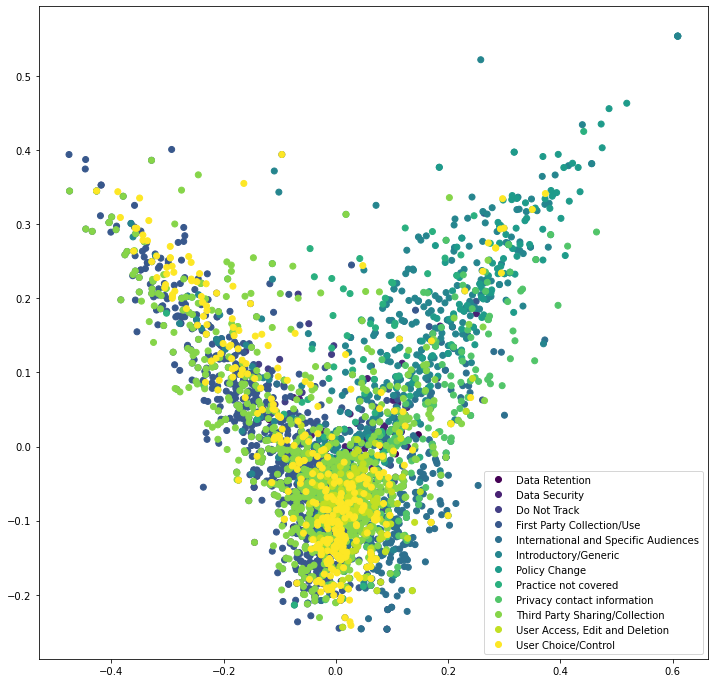

In [43]:
plt.figure(figsize=(12, 12))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_)
plt.legend(handles=plot.legend_elements()[0], labels=list(le.classes_))
plt.show()

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X_)

In [45]:
# we need 1194 componenets from pca to explain 95% of the variance
import bisect
bisect.bisect(pca.explained_variance_ratio_.cumsum(), 0.95)

1189

In [46]:
len(Xt[0])

3683

# t-SNE

In [47]:
from sklearn.manifold import TSNE
tsn = TSNE(n_components=2, learning_rate='auto', init='random')
Xt = tsn.fit_transform(X_)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
plt.figure(figsize=(12, 12))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_)
plt.legend(handles=plot.legend_elements()[0], labels=list(le.classes_))
plt.show()